## Matheus Stacco Felipe

A partir da analise dos dados do MovieLens, foi possivel observar que certas categorias de filmes são mais propensas a serem produzidas e vistas, enquantos outras geram uma maior integração com os espectadores, tendo um maior número de votos por filme, além disso será discutido a têndencia de produção e de votos em relação ao ano de lançamento do filme.

## Formação Data Science Alura - Análise exploratória do MovieLens

Na formação de Data Scienda www.alura.com.br um dos conjuntos de dados que utilizamos é o de avaliações para filmes no site MovieLens. Neste projeto faremos uma análise exploratória desses dados.

### Dicas para o projeto completo:

- todo gráfico deve ter um título, labels e legendas que fazem sentido
- configure um tamanho adequado para os gráficos
- utilize as versões dos arquivos de dados disponíveis no github

## Pergunta: conferindo as versões utilizadas

- Devemos usar pandas 0.24.0 ou mais recente
- Devemos usar seaborn 0.9.0 ou mais recente
- Devemos usar scipy 1.2.0 ou mais recente

In [1]:
import pandas as pd
import seaborn as sns
import scipy

print("Usando pandas %s" % pd.__version__)
print("Usando seaborn %s" % sns.__version__)
print("Usando scipy %s" % scipy.__version__)

Usando pandas 0.25.1
Usando seaborn 0.9.0
Usando scipy 1.3.1


In [2]:
sns.set_style('whitegrid')
sns.set_palette('Set2')

## Pergunta: carregue os filmes

- os dados `https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/movies.csv` devem ser carregado em `filmes`
- renomeie as colunas para `filmeId`, `titulo` e `generos`
- configure o indice (`index`) para ser o `filmeId`

In [3]:
filmes = pd.read_csv('movies.csv')
filmes.columns = ['filmeId','titulo','generos']
filmes.set_index('filmeId', inplace = True)

In [4]:
filmes.shape

(9742, 2)

In [5]:
filmes.head()

,titulo,generos
filmeId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [6]:
print("Carregamos %d filmes" % len(filmes))
if(len(filmes) != 9742):
    print("ERRO! O conjunto de dados que estamos trabalhando nesse projeto possui 9742 elementos.")

Carregamos 9742 filmes


Vamos extrair o ano dos filmes (código já pronto): 

In [7]:
ano_de_lancamento = filmes.titulo.str.extract("\((\d{4})\)")
filmes['ano_de_lancamento'] = ano_de_lancamento.astype(float)
filmes.head()

,titulo,generos,ano_de_lancamento
filmeId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0
3,Grumpier Old Men (1995),Comedy|Romance,1995.0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0
5,Father of the Bride Part II (1995),Comedy,1995.0


## Pergunta: carregando as notas

- os dados `https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/ratings.csv` devem ser carregado em `notas`
- renomeie as colunas para `usuarioId`, `filmeId`, `nota` e `momento`

In [8]:
notas = pd.read_csv('ratings.csv')
notas.columns = ['usuarioId','filmeId','nota','momento']

In [9]:
notas.shape

(100836, 4)

In [10]:
notas.head(10)

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400
6,1,101,5.0,964980868
7,1,110,4.0,964982176
8,1,151,5.0,964984041
9,1,157,5.0,964984100


## Pergunta: gere uma nova feature, a média dos votos por filme

- crie uma nova coluna chamada `nota_media` dentro do dataframe `filmes`

Dicas:
- como filmeId já é o indice de seu dataframe filmes, se você possui uma série com o número de votos por filme, basta atribuir uma nova coluna normalmente que será usado o mesmo índice

In [11]:
filmes['nota_media'] =notas.groupby('filmeId')['nota'].mean()

In [12]:
filmes.head()

,titulo,generos,ano_de_lancamento,nota_media
filmeId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.920930
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3.431818
3,Grumpier Old Men (1995),Comedy|Romance,1995.0,3.259615
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0,2.357143
5,Father of the Bride Part II (1995),Comedy,1995.0,3.071429


## Pergunta: remova os filmes com menos de 50 avaliações

- conte o número de notas por filme
- adicione uma coluna nova chamada `total_de_votos` a `filmes` que representa o número de avaliações que aquele filme teve no conjunto de dados
- remova os que tem 49 ou menos de `filmes`

## Solução

In [13]:
# solução para calcular o total de votos por filme

filmes['total_de_votos'] = notas.groupby('filmeId')['usuarioId'].sum()


In [14]:
# solução para criar a nova coluna e filtrar os filmes
filmes = filmes.query('total_de_votos >= 50')

# Visualizando os dados gerais

## Pergunta: Visualize as notas médias

- histograma
- cummulative distribution function

Dicas:

- lembre-se de colocar um título nas imagens além de nomes nos eixos x e y
- para gerar a versão cumulativa lembre-se de usar os parâmetros `hist_kws` e `kde_kws` para definir `'cumulative'=True`

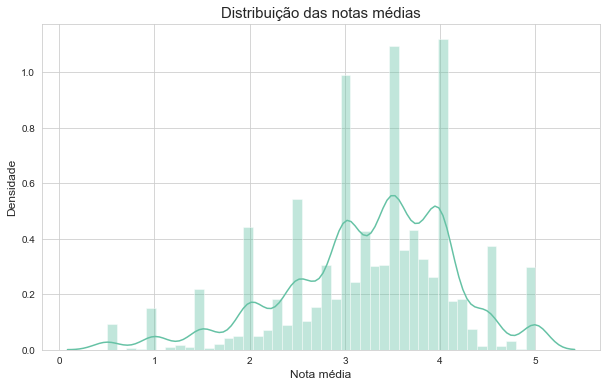

In [15]:
# solução histograma

ax = sns.distplot(filmes['nota_media'])
ax.set_title('Distribuição das notas médias' , fontsize = 15)
ax.set_xlabel('Nota média' , fontsize = 12)
ax.set_ylabel('Densidade', fontsize = 12)
ax.figure.set_size_inches(10,6)

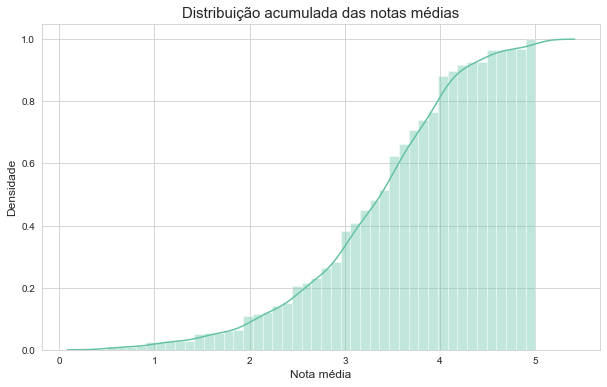

In [16]:
# solução cumulativa

ax = sns.distplot(filmes['nota_media'] , hist_kws={'cumulative':True}, kde_kws={'cumulative':True})
ax.set_title('Distribuição acumulada das notas médias' , fontsize = 15)
ax.set_xlabel('Nota média' , fontsize = 12)
ax.set_ylabel('Densidade', fontsize = 12)
ax.figure.set_size_inches(10,6)

## Pergunta: Visualize o total de votos

- histograma
- cummulative distribution function

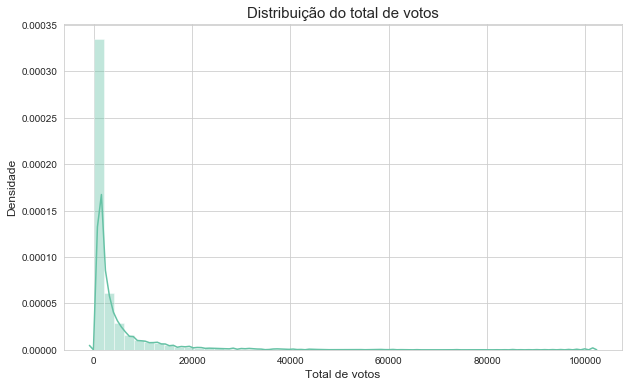

In [17]:
# solução histograma

ax = sns.distplot(filmes['total_de_votos'])
ax.set_title('Distribuição do total de votos' , fontsize = 15)
ax.set_xlabel('Total de votos' , fontsize = 12)
ax.set_ylabel('Densidade', fontsize = 12)
ax.figure.set_size_inches(10,6)

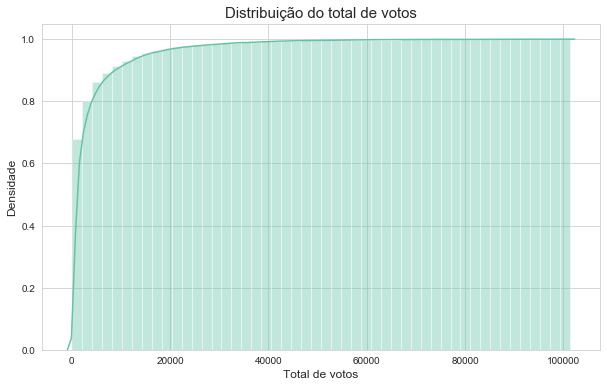

In [18]:
# solução cumulativa

ax = sns.distplot(filmes['total_de_votos'] , hist_kws= {'cumulative':True} , kde_kws={'cumulative':True})
ax.set_title('Distribuição do total de votos' , fontsize = 15)
ax.set_xlabel('Total de votos' , fontsize = 12)
ax.set_ylabel('Densidade', fontsize = 12)
ax.figure.set_size_inches(10,6)


## Pergunta: 20% dos filmes do dataframe tem nota maior que? 

- lembre-se da função `quantile` do pandas

In [19]:
# solução

nota_limite_dos_20_porcento = filmes['nota_media'].quantile(0.8)

In [20]:
print("20 porcento dos filmes tem nota maior que de %.2f" % nota_limite_dos_20_porcento)

20 porcento dos filmes tem nota maior que de 4.00


## Vamos separar a coluna `generos` em diversas colunas.

- O código já está pronto.

In [21]:
filmes['generos'] = filmes['generos'].str.replace('-', '')
generos = filmes['generos'].str.get_dummies()
print("Temos %d generos distintos" % generos.shape[1])

Temos 20 generos distintos


In [22]:
filmes = filmes.join(generos).drop(columns=['generos'], axis=1)
filmes.head()

,titulo,ano_de_lancamento,nota_media,total_de_votos,(no genres listed),Action,Adventure,Animation,Children,Comedy,...,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
filmeId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),1995.0,3.920930,65904.0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,Jumanji (1995),1995.0,3.431818,36251.0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),1995.0,3.259615,14747.0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,Waiting to Exhale (1995),1995.0,2.357143,1539.0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
5,Father of the Bride Part II (1995),1995.0,3.071429,14679.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## Pergunta: visualização de quantos filmes existem por genero

- Para cada um dos generos você deve agrupar o número de filmes
- Ordene as barras, na esquerda o genero com mais filmes, na direita o que tem menos filmes

Dica:

- Para fazer a soma de uma ou mais colunas individualmente você pode usar `seu_dataframe.sum()`
- Não precisa usar o dataframe `filmes`, somente o dataframe `generos`
- Em certas situações é mais fácil usar as funções de plotagem do pandas ao invés do seaborn

In [23]:
# solução

filmes_por_genero = generos.sum().to_frame().reset_index()
filmes_por_genero.columns = ['Categoria', 'Quantidade de filmes']
filmes_por_genero.sort_values( by = ['Quantidade de filmes'], ascending = False , inplace = True)

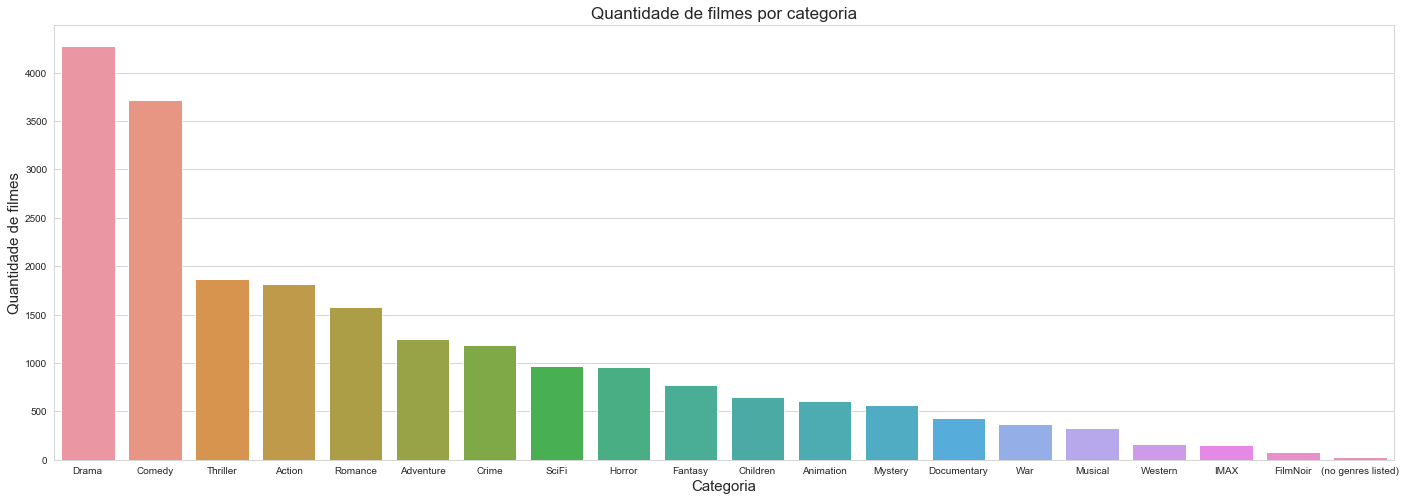

In [24]:
ax = sns.barplot(x='Categoria',y = 'Quantidade de filmes' , data=filmes_por_genero)
ax.figure.set_size_inches(24,8)
ax.set_title('Quantidade de filmes por categoria' , fontsize = 17)
ax.set_xlabel('Categoria' , fontsize = 15)
ax.set_ylabel('Quantidade de filmes' , fontsize = 15)
ax

## Pergunta: Quais são os 5 generos com mais filmes?

Dica:

- `sort_values()` pode ordenar uma Series do pandas

In [25]:
top5_generos_em_quantidade_de_filmes = filmes_por_genero[0:5]['Categoria'].values

In [26]:
print(top5_generos_em_quantidade_de_filmes)

['Drama' 'Comedy' 'Thriller' 'Action' 'Romance']


## Pergunta: visualização de votos por genero

- o código que gera os votos por genero já está pronto
- ordene as categorias da mais visualizada para a menos visualizada
- gere a visualização por genero

In [27]:
votos_por_genero_por_filme = pd.DataFrame((generos.values.T * filmes['total_de_votos'].values).T, columns = generos.columns)
votos_por_genero_por_filme.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
0,0.0,0.0,65904.0,65904.0,65904.0,65904.0,0.0,0.0,0.0,65904.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,36251.0,0.0,36251.0,0.0,0.0,0.0,0.0,36251.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,14747.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14747.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1539.0,0.0,0.0,1539.0,0.0,0.0,0.0,0.0,0.0,0.0,1539.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,14679.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
# solucão
votos_por_genero = votos_por_genero_por_filme.sum().to_frame().reset_index()
votos_por_genero.columns = ['Categoria','Quantidade de votos']
votos_por_genero.sort_values(by = ['Quantidade de votos'] , ascending = False , inplace = True)

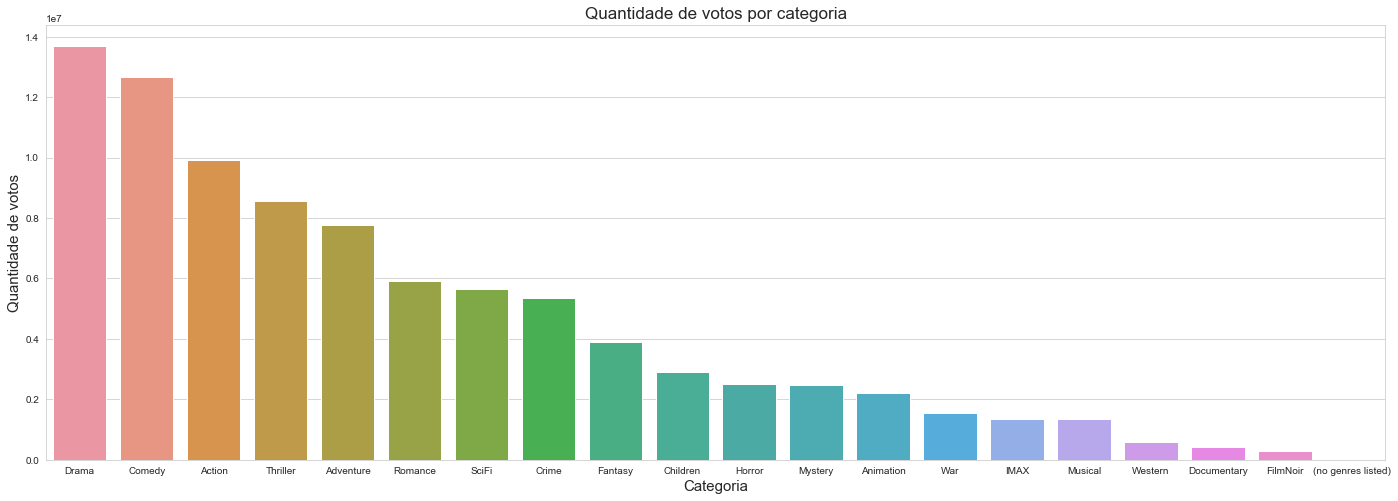

In [29]:
# solução
ax = sns.barplot(x='Categoria',y = 'Quantidade de votos' , data=votos_por_genero)
ax.figure.set_size_inches(24,8)
ax.set_title('Quantidade de votos por categoria' , fontsize = 17)
ax.set_xlabel('Categoria' , fontsize = 15)
ax.set_ylabel('Quantidade de votos' , fontsize = 15)
ax

In [30]:
votos_por_genero

,Categoria,Quantidade de votos
8,Drama,13703011.0
5,Comedy,12664744.0
1,Action,9933431.0
17,Thriller,8574538.0
2,Adventure,7784761.0
15,Romance,5901108.0
16,SciFi,5644689.0
6,Crime,5338664.0
9,Fantasy,3883974.0
4,Children,2907286.0


## Pergunta : votos por filme por genero

Queremos entender a quantidade de votos em relação a quantidade de filmes existentes naquele genero.

Por exemplo: 
- se temos 1000 votos de `Ação` e 10 filmes desse genero, foram 100 votos por filme nesse genero.
- se o gênero `Documentário` tem 2 filmes e 500 votos, ele tem 250 votos por filme nesse gênero.

Queremos entender isso, a "popularidade" média de um filme em cada categoria, isto é, o número de votos dividido pelo número de filmes, organizado para cada categoria.

- Você já possui o número de votos por genero
- Calcule o número de votos por genero dividido pelo total de filmes por genero
- Ordene do maior para o menor
- Plote um gráfico para visualizarmos esses dados

In [31]:
# solucao código
votos_por_filme_por_genero = pd.DataFrame()
votos_por_filme_por_genero['Categoria'] = filmes_por_genero['Categoria']
votos_por_filme_por_genero['Quantidade de filmes'] = filmes_por_genero['Quantidade de filmes']
votos_por_filme_por_genero['Quantidade de votos'] = votos_por_genero['Quantidade de votos']
votos_por_filme_por_genero['Quantidade de votos por filme'] = votos_por_filme_por_genero['Quantidade de votos']/votos_por_filme_por_genero['Quantidade de filmes']
votos_por_filme_por_genero.sort_values(by=['Quantidade de votos por filme'] , ascending = False , inplace = True)

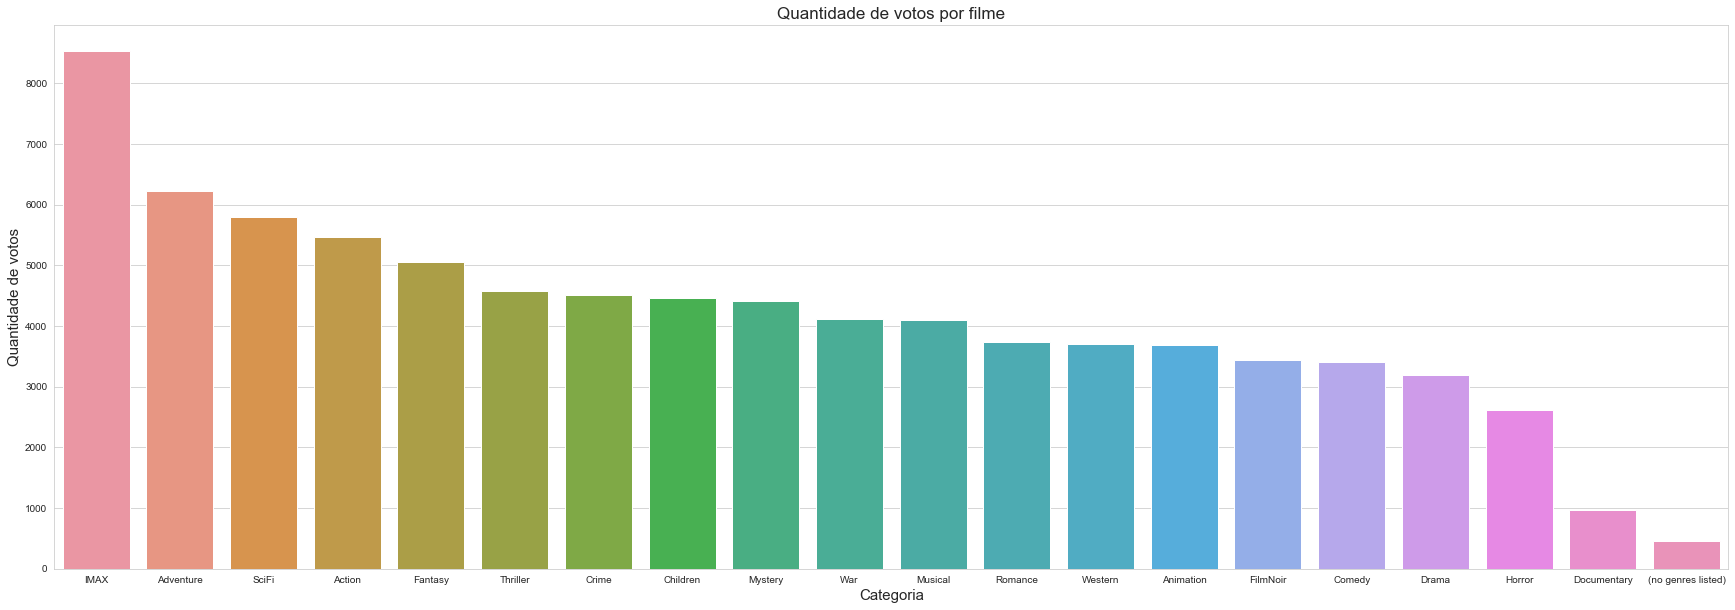

In [32]:
# solução com visualização 
ax = sns.barplot(x='Categoria',y = 'Quantidade de votos por filme' , data = votos_por_filme_por_genero)
ax.figure.set_size_inches(30,10)
ax.set_title('Quantidade de votos por filme' , fontsize = 17)
ax.set_xlabel('Categoria' , fontsize = 15)
ax.set_ylabel('Quantidade de votos' , fontsize = 15)
ax

## Pergunta: Olhando as 3 últimas visualizações o que você conclui sobre os generos `Action` e `War`?

### Solução (texto livre):
    
    

A respeito do gênero Action, podemos observar que apesar de haver menos de 50% da quantidade de filmes de gêneros como Drama e Comedy, temos 70% da quantidade de votos em comparação com essas mesmas categorias, o que acaba por resultar em uma quantidade de votos por filme maior no gênero Action, isso pode indicar ou que o engajamento do publico que assiste filmes desse gênero é maior ou que apesar de serem lançados menos filmes, o número de pessoas que os assitem é maior,  sendo assim possível que mais pessoas votem.

Sobre a categoria War, temos que ele é o 6° gênero com menos filmes e também o 6° com menos votos, porém sua quantidade de votos por filme se encontra próximo a mediana, essa relação pode ter os mesmo fatos geradores que foram discutidos na análise do gênero Action

## Pergunta: Crie 2 boxplots no mesmo plot comparando a coluna `total_de_votos` dos filmes de categoria `Horror` e `Adventure`  

Dica:

- as vezes é mais fácil usar o boxplot do matplotlib ao invés do seaborn
- plt.boxplot suporta o parâmetro labels com uma lista de nomes para cada boxplot plotado

In [33]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Boxplot dos votos por gênero')

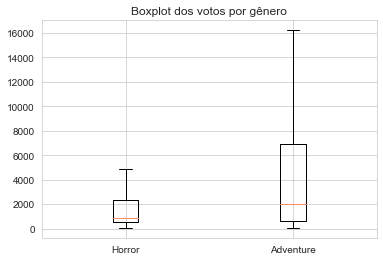

In [34]:
# solução:
ax = plt.boxplot([filmes.query('Horror == 1')['total_de_votos'] , filmes.query('Adventure == 1')['total_de_votos']] 
                 ,labels = ['Horror','Adventure']
                 ,showfliers = False)
plt.title('Boxplot dos votos por gênero')

## Pergunta: mostre agora um boxplot para cada uma das categorias

Dica:
- use generos.columns para acessar todos os gêneros
- já removemos os hífens dos nomes das colunas quando criamos as colunas de gêneros
- plt (pyplot) do matplotlib suporta a função xticks(rotation=90) para rotacionar os labels

In [35]:
generos.columns

Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'FilmNoir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'SciFi', 'Thriller',
       'War', 'Western'],
      dtype='object')

In [36]:
filmes.rename(columns = {'(no genres listed)':'no_genres_listed'},inplace=True)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20]), <a list of 20 Text xticklabel objects>)

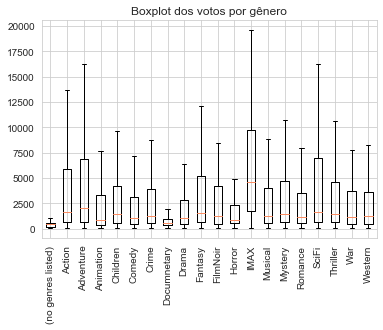

In [37]:
ax = plt.boxplot([filmes.query('no_genres_listed == 1')['total_de_votos'],
                 filmes.query('Action == 1')['total_de_votos'] ,
                 filmes.query('Adventure == 1')['total_de_votos'],
                 filmes.query('Animation == 1')['total_de_votos'],
                 filmes.query('Children == 1')['total_de_votos'],
                 filmes.query('Comedy == 1')['total_de_votos'],
                 filmes.query('Crime == 1')['total_de_votos'],
                 filmes.query('Documentary == 1')['total_de_votos'],
                 filmes.query('Drama == 1')['total_de_votos'],
                 filmes.query('Fantasy == 1')['total_de_votos'],
                 filmes.query('FilmNoir == 1')['total_de_votos'],
                 filmes.query('Horror == 1')['total_de_votos'],
                 filmes.query('IMAX == 1')['total_de_votos'],
                 filmes.query('Musical == 1')['total_de_votos'],
                 filmes.query('Mystery == 1')['total_de_votos'],
                 filmes.query('Romance == 1')['total_de_votos'],
                 filmes.query('SciFi == 1')['total_de_votos'],
                 filmes.query('Thriller == 1')['total_de_votos'],
                 filmes.query('War == 1')['total_de_votos'],
                 filmes.query('Western == 1')['total_de_votos']
                 ] 
                 ,labels = ['(no genres listed)','Action','Adventure','Animation','Children','Comedy','Crime','Documnetary','Drama','Fantasy','FilmNoir','Horror','IMAX','Musical','Mystery','Romance','SciFi','Thriller','War','Western']
                 ,showfliers = False)
plt.title('Boxplot dos votos por gênero')
plt.xticks(rotation=90) 

## Pergunta: desejo criar um filme com somente um dos gêneros: `Horror` ou `Adventure`. Quero ter uma chance maior de ter um faturamento que pague minhas contas, mesmo que não seja um super sucesso absurdo de vendas. Qual dos 2 gêneros você sugere?

In [38]:
filmes.query('Horror == 1')['total_de_votos'].quantile(0.1)

307.0

In [39]:
filmes.query('Adventure == 1')['total_de_votos'].quantile(0.1)

365.0

### Solução:
    


A média do total de votos do gênero Adventure é maior do do de Horror, assim como a variação existente na distribuição desse total,o que nos faria pensar duas vezes sobre realizar um filme desse gênero pensando somente em pagar as contas , porém os limiter inferiores da distribuição de notas desse filmes são maiores que os do gênero Horror, podemos avaliar isso observando os valores do primeiro decentil de cada categoria, portanto filmes com o mesmo custo, tem mais chance de "pagar as contas"  se forem do gênero adveture.

## Pergunta: nossa análise foi até então visual. Aplique um teste estatístico para verificar se existe significância estatística na distribuição dos votos dos filmes de `Adventure` e `Horror`. Sua recomendação continua a mesma? Explique.

Passos:

- visualize a distribuição de ambas através de histogramas
- se suspeitar normalidade na distribuição, faça um teste de normalidade para ambas
- aplique um teste adequado de comparação das distribuições
- explique o resultado encontrado
- utilize p=0.05

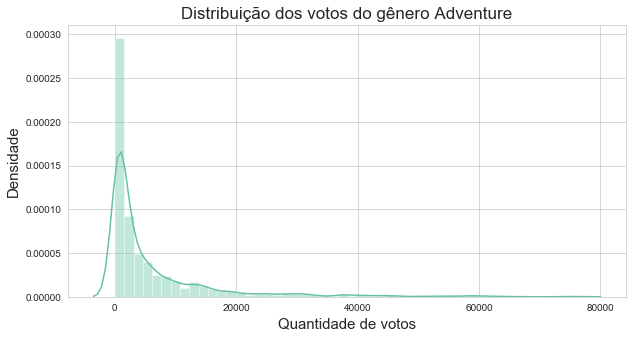

In [40]:
# solucao histograma de aventura
ax = sns.distplot(filmes.query('Adventure == 1')['total_de_votos'])
ax.figure.set_size_inches(10,5)
ax.set_title('Distribuição dos votos do gênero Adventure' , fontsize = 17)
ax.set_xlabel('Quantidade de votos' , fontsize = 15)
ax.set_ylabel('Densidade' , fontsize = 15)
ax

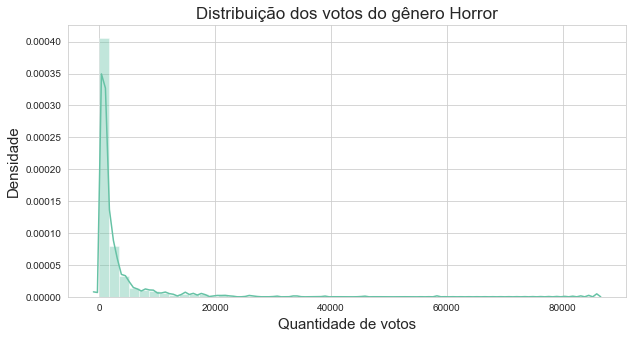

In [41]:
# solucao histograma de horror
ax = sns.distplot(filmes.query('Horror == 1')['total_de_votos'])
ax.figure.set_size_inches(10,5)
ax.set_title('Distribuição dos votos do gênero Horror' , fontsize = 17)
ax.set_xlabel('Quantidade de votos' , fontsize = 15)
ax.set_ylabel('Densidade' , fontsize = 15)
ax

In [42]:
from scipy.stats import normaltest

In [43]:
# solucao teste de normalidade ou justificativa para nao utiliza-lo
_ , pvalor_Aventure = normaltest(filmes.query('Adventure == 1')['total_de_votos'])
print('O pvalor desse teste para o gênero Aventure é {}'.format(pvalor_Aventure))


O pvalor desse teste para o gênero Aventure é 4.123217458002425e-183


In [44]:
_ , pvalor_Horror = normaltest(filmes.query('Horror == 1')['total_de_votos'])
print('O pvalor desse teste para o gênero Horror é {}'.format(pvalor_Horror))

O pvalor desse teste para o gênero Horror é 3.0455295364701683e-273


Como temos ambos pvalues menores que 0,05 , rejeitaremos a hipótese nula de que as distribuições são normais, portanto não poderemos utilizar as estatisticas t e z para verificar se o número de votos médio é igual para as categorias.Então utilizaremos o teste não-paramétrico de Wilcoxon.

In [45]:
# solução com o teste desejado
from scipy.stats import ranksums

_,pvalor_wilcoxon = ranksums(filmes.query('Horror == 1').total_de_votos , filmes.query('Adventure == 1').total_de_votos)
print('O pvalor para o teste de wilcoxon é {}'.format(pvalor_wilcoxon))

O pvalor para o teste de wilcoxon é 4.888329299133372e-24


### Solução (explique sua conclusão):



Tendo em vista que a hipotese nula do teste de ranqueamento de Wilcoxnon é de que as observações vieram das mesma distribuição, ao se obter um pvalor < 0,05 e reijatar essa hipótese, assumimos que as distribuições são de fato diferentes, o que não altera nossa recomendaçao de fazer um filme do gênero Adventure.

## Pergunta: Faça os mesmos boxplots para as notas médias (`nota_media`) dos gêneros `Adventure` e `Horror`.

Text(0.5, 1.0, 'Boxplot dos votos por gênero')

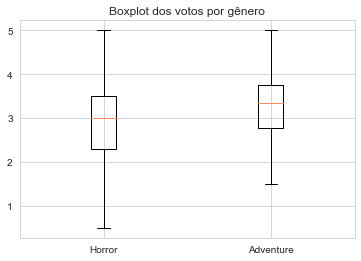

In [46]:
# solução:

ax = plt.boxplot([filmes.query('Horror == 1')['nota_media'] , filmes.query('Adventure == 1')['nota_media']] 
                 ,labels = ['Horror','Adventure']
                 ,showfliers = False)
plt.title('Boxplot dos votos por gênero')


## Pergunta: Quero fazer um filme que seja sucesso de crítica, com pessoas dando notas altas, mesmo que não tenha um número muito grande de pessoas assistindo. Qual gênero você recomenda se tenho que escolher somente um entre `Adventure` e `Horror`?

### Solução:



Pela análise gráfica temos que a media das notas médias do gênero Adventure é maior do que do Horror, além da distribuição dessas notas ser mais localizada, ou seja, as notas médias se espalham menos ao redor da média do que na categario Horror, o que faz com que as chances de se obter uma nota próxima a média maior serão maiores.

## Pergunta: nossa análise foi até então visual. Aplique um teste estatístico para verificar se existe significância estatística na distribuição das notas dos filmes de `Adventure` e `Horror`.

Passos:

- visualize a distribuição de ambas através de histogramas
- se suspeitar normalidade na distribuição, faça um teste de normalidade para ambas
- aplique um teste adequado de comparação das distribuições
- explique o resultado encontrado
- utilize p=0.05

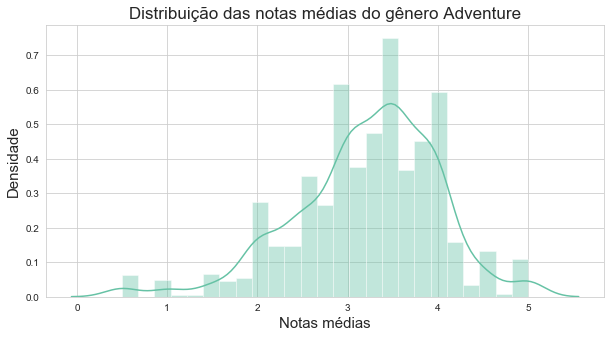

In [47]:
# solucao histograma de aventura
ax = sns.distplot(filmes.query('Adventure == 1')['nota_media'])
ax.figure.set_size_inches(10,5)
ax.set_title('Distribuição das notas médias do gênero Adventure' , fontsize = 17)
ax.set_xlabel('Notas médias' , fontsize = 15)
ax.set_ylabel('Densidade' , fontsize = 15)
ax

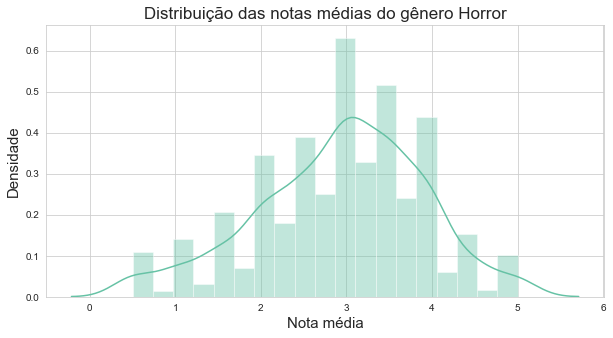

In [48]:
# solucao histograma de horror
ax = sns.distplot(filmes.query('Horror == 1')['nota_media'])
ax.figure.set_size_inches(10,5)
ax.set_title('Distribuição das notas médias do gênero Horror' , fontsize = 17)
ax.set_xlabel('Nota média' , fontsize = 15)
ax.set_ylabel('Densidade' , fontsize = 15)
ax

In [49]:
_ , pvalor_Aventure = normaltest(filmes.query('Adventure == 1')['nota_media'])
print('O pvalor desse teste para o gênero Aventure é {}'.format(pvalor_Aventure))

O pvalor desse teste para o gênero Aventure é 2.427022841322143e-21


In [50]:
_ , pvalor_Horror = normaltest(filmes.query('Horror == 1')['nota_media'])
print('O pvalor desse teste para o gênero Horror é {}'.format(pvalor_Horror))

O pvalor desse teste para o gênero Horror é 4.0378632405465084e-05


Como temos ambos pvalues menores que 0,05 , rejeitaremos a hipótese nula de que as distribuições são normais, portanto não poderemos utilizar as estatisticas t e z para verificar se a média das notas médias é igual para as categorias.Então utilizaremos o teste não-paramétrico de Wilcoxon.

In [51]:
_,pvalor_wilcoxon = ranksums(filmes.query('Horror == 1')['nota_media'] , filmes.query('Adventure == 1')['nota_media'])
print('O pvalor para o teste de wilcoxon é {}'.format(pvalor_wilcoxon))

O pvalor para o teste de wilcoxon é 2.847346377045557e-13


Portanto, como pvalue é menor que 0,05 , rejeitaremos a hipótese nula do teste de ranqueamento de Wilcoxon de que as observações vieram de distribuições iguais, e assumiremos que as notas de uma distribuição terem tendencia a serem maiores que as da outra.

## Sua recomendação para maior sucesso de crítica em nota alta entre `Horror` e `Adventure` continua a mesma? Explique.



### Solução:


Como, pelos testtes estatísticos, rejeitamos que as distribuições são iguais, assumiremos que elas são diferentes, e assim nossa hipótese inicial de que Adventure parece ser um gênero com maior possibilidade de se obter um sucesso de crítica continua válida.

## Pergunta: Quero fazer um filme que seja primeiro sucesso de crítica, com pessoas dando notas altas. Em segundo lugar quero que seja popular (mais pessoas assistam). Com as informações visuais e estatísticas, supondo poder escolher somente um, qual dois 2 gêneros você recomenda agora? `Horror` ou `Adventure`?

### Solução:



Com todas as informações analisadas até agora, podemos recomendar o gênero , visto que ele foi nossa recomendação nos dois casos isolados, ele deve ser nossa recomendação no caso conjunto.

## Pergunta: Quais são os top 5 filmes dos 2 generos mais assistidas?

- utilize os 2 generos mais votados em `votos_por_genero`
- utilize a `nota_media` para definir o top 5 filmes
- o resultado são 5, não 10 filmes

In [52]:
votos_por_genero

,Categoria,Quantidade de votos
8,Drama,13703011.0
5,Comedy,12664744.0
1,Action,9933431.0
17,Thriller,8574538.0
2,Adventure,7784761.0
15,Romance,5901108.0
16,SciFi,5644689.0
6,Crime,5338664.0
9,Fantasy,3883974.0
4,Children,2907286.0


In [53]:
# solução: calculando os 2 generos mais votados

filmes_generos_mais_votados = filmes.query('Drama == 1 | Comedy == 1')
filmes_generos_mais_votados.sort_values(by = ['nota_media'] ,ascending = False)

,titulo,ano_de_lancamento,nota_media,total_de_votos,no_genres_listed,Action,Adventure,Animation,Children,Comedy,...,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
filmeId,,,,,,,,,,,,,,,,,,,,,
76091,Mother (Madeo) (2009),2009.0,5.0,610.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
134004,What Love Is (2007),2007.0,5.0,89.0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
131610,Willy/Milly (1986),1986.0,5.0,89.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5607,"Son of the Bride (Hijo de la novia, El) (2001)",2001.0,5.0,198.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
132153,Buzzard (2015),2015.0,5.0,89.0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67799,The Butterfly Effect 3: Revelations (2009),2009.0,0.5,298.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
54274,I Know Who Killed Me (2007),2007.0,0.5,599.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
54768,Daddy Day Camp (2007),2007.0,0.5,219.0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [54]:
top_5 = filmes_generos_mais_votados.sort_values(by = ['nota_media'] ,ascending = False)[0:5]['titulo'].values

In [55]:
# solução: encontrando os top 5 filmes desses generos
print(top_5)

['Mother (Madeo) (2009)' 'What Love Is (2007)' 'Willy/Milly (1986)'
 'Son of the Bride (Hijo de la novia, El) (2001)' 'Buzzard (2015)']


## Pergunta: Quais são os 2 generos com maior valor de correlação com a `nota_media`? E os 2 com menor valor de correlação com a `nota_media`?

- O pandas possui a função `corr` para calcular correlação entre todas as colunas

In [56]:
# solucao
filmes.corr().sort_values(by = ['nota_media'] , ascending = False)['nota_media']

nota_media           1.000000
Drama                0.164750
Documentary          0.127861
total_de_votos       0.123320
War                  0.072165
Animation            0.070450
Romance              0.052492
FilmNoir             0.043630
Mystery              0.019322
Western              0.019098
Crime                0.015971
no_genres_listed     0.007385
IMAX                 0.007190
Musical              0.006388
Fantasy             -0.013351
Adventure           -0.021237
Children            -0.047565
Thriller            -0.058671
SciFi               -0.063486
Comedy              -0.076731
Action              -0.095714
ano_de_lancamento   -0.111025
Horror              -0.129642
Name: nota_media, dtype: float64

Os dois gêneros com maior correlação com a nota média são Drama e Documentary , enquanto os que tem menos correlção são Action e Horror.

## Pergunta: Quais são os 2 generos com maior correlação com `total_de_votos`? E quais os 2 com menor correlação com `total_de_votos`?

In [57]:
# solucao
filmes.corr().sort_values(by = ['total_de_votos'] , ascending = False)['total_de_votos']

total_de_votos       1.000000
Adventure            0.154257
Action               0.140787
nota_media           0.123320
SciFi                0.113422
IMAX                 0.094131
Thriller             0.081002
Fantasy              0.068265
Crime                0.058149
Children             0.039670
Mystery              0.035247
Romance              0.019964
War                  0.019730
Musical              0.018109
Animation            0.009533
Western              0.005270
FilmNoir             0.000150
Comedy              -0.002409
ano_de_lancamento   -0.006955
no_genres_listed    -0.025208
Drama               -0.029027
Horror              -0.038883
Documentary         -0.075677
Name: total_de_votos, dtype: float64

Os dois gêneros com maior correlação como total de votos são Adventure e Action , enquanto os que tem menos correlção são Horror e Documentary.

## Pergunta: Visualize graficamente o relacionamento entre ano de lançamento e nota média

- Use o gráfico `lineplot`

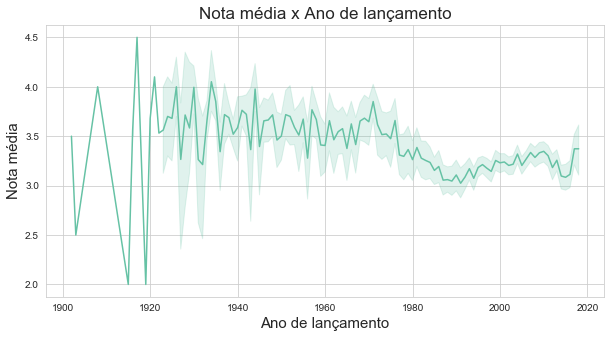

In [58]:
# solucao
ax = sns.lineplot(x = filmes['ano_de_lancamento'], y = filmes['nota_media'])
ax.figure.set_size_inches(10,5)
ax.set_title('Nota média x Ano de lançamento' , fontsize = 17)
ax.set_xlabel('Ano de lançamento' , fontsize = 15)
ax.set_ylabel('Nota média' , fontsize = 15)
ax

## Pergunta: Interprete a correlação entre `ano_de_lancamento` e a `nota_media`?

- Calcule a correlação numericamente (use o `corr` do pandas)
- Correlação não implica causalidade, qual "problema" na coleta dos dados pode gerar esse tipo de correlação?

In [59]:
# solução (código)
filmes.corr().sort_values(by = ['nota_media'] , ascending = False)['nota_media']

nota_media           1.000000
Drama                0.164750
Documentary          0.127861
total_de_votos       0.123320
War                  0.072165
Animation            0.070450
Romance              0.052492
FilmNoir             0.043630
Mystery              0.019322
Western              0.019098
Crime                0.015971
no_genres_listed     0.007385
IMAX                 0.007190
Musical              0.006388
Fantasy             -0.013351
Adventure           -0.021237
Children            -0.047565
Thriller            -0.058671
SciFi               -0.063486
Comedy              -0.076731
Action              -0.095714
ano_de_lancamento   -0.111025
Horror              -0.129642
Name: nota_media, dtype: float64

### Solução (explicação)



Se coletarmos uma amostra pequena, poderemos ter uma correlação observada não nula entre as variáveis enquanto a correlação verdadeira entre elas é nula.Outro problema no ambito da coleta de dados é de que se a amostragem não for feita de modo aleatório, ou seja, de modo que a amostra simule corretamente a população, podemos ter uma correlação amostral que nos faça pensar em algum canal que uma varivale afete a outra, enquanto na população não há.  

In [60]:
# solução
infos = pd.DataFrame()
infos['ano_de_lancamento'] = filmes['ano_de_lancamento']
infos['nota_media'] = filmes['nota_media']
infos['total_de_votos'] = filmes['total_de_votos']
infos.head()

,ano_de_lancamento,nota_media,total_de_votos
filmeId,,,
1,1995.0,3.920930,65904.0
2,1995.0,3.431818,36251.0
3,1995.0,3.259615,14747.0
4,1995.0,2.357143,1539.0
5,1995.0,3.071429,14679.0


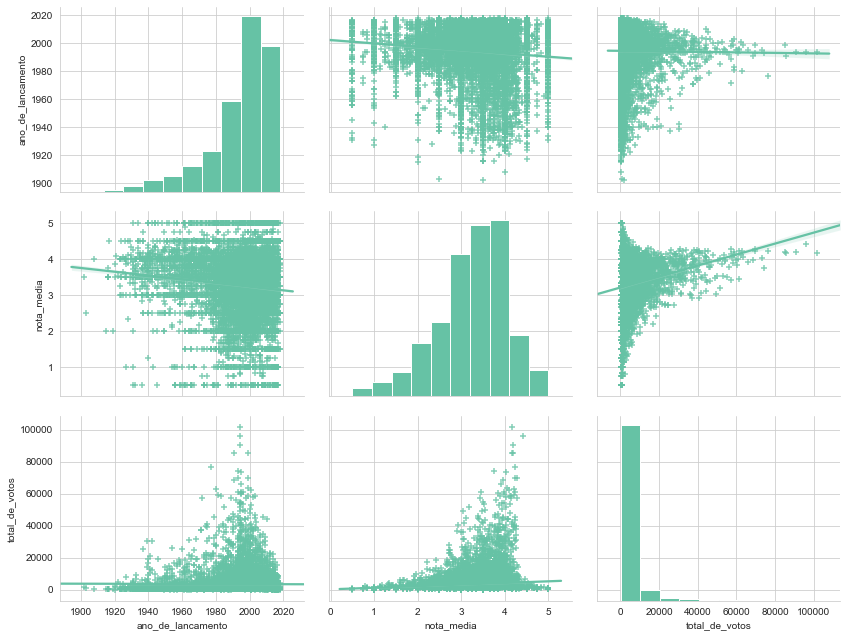

In [61]:
ax = sns.pairplot(infos.dropna() , kind = 'reg' ,markers= '+' , height=3, aspect=1.3, )


## Pergunta: analise um pairplot dos filmes de `Animation`

- use o dataframe `filmes`
- em um único pairplot separe com cores distintas os filmes da categoria `Animation` dos outros
- use uma palete como `husl`
- use marcadores distintos para cada um dos dois grupos
- faça o pairplot usando seaborn e coloque uma regressão linear para cada pequeno plot dentro dele
- tanto em x quanto y use somente três variáveis: `total_de_votos`, `ano_de_lancamento`, `nota_media`

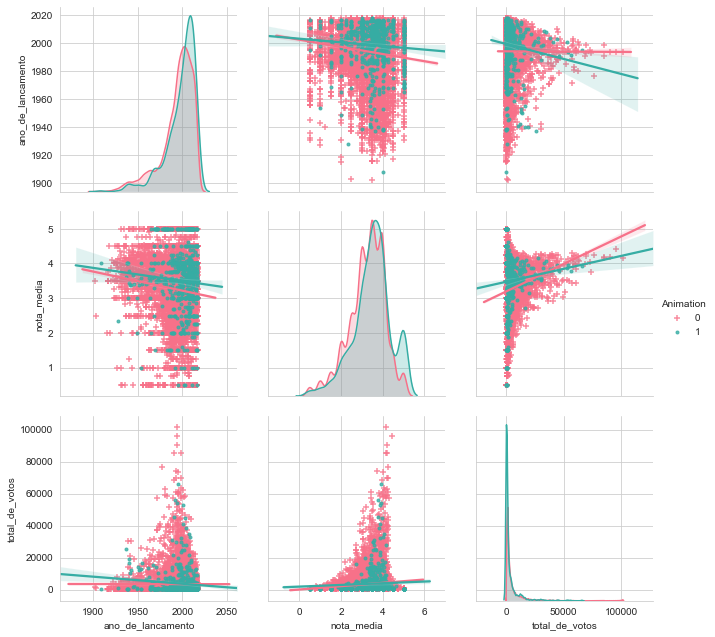

In [62]:
ax = sns.pairplot(filmes.dropna() ,x_vars = ['ano_de_lancamento', 'nota_media', 'total_de_votos'],
                  y_vars = ['ano_de_lancamento', 'nota_media', 'total_de_votos'],
                  hue = 'Animation' , kind = 'reg' , markers = ['+' , '.'] , palette = 'husl', height = 3)

## Pergunta: Analise a regressão em relação ao ano de lançamento.

- Como parece se comportar a `nota_media` de filmes de `Animation` mais antigos e mais recentes? (ano_de_lancamento x nota_media). Essa correlação parece ser baixa, mas parece ser linear?
- E o `ano_de_lancamento` x `total_de_votos`?
- E das outras categorias? Compare isso com os outros filmes.
- O que leva você levantar como hipótese para esse resultado?

### Solução:



 A relação entre ano de lançamento e nota média não parece ser linear , pois parece que podemos traçar um segmento de uma parábola, que se aduequará melhor a distribuição dos dados do que uma reta.A relação ente ano de lançamento e total de votos tambem aperenta não ser linear , nesse caso poderiamos traçar uma curva exponencial que se adaptaria melhor aos dados de Animation.As outras categorias possuem um comportamento menos linear nas análises feitas, essa diferença entre o comportamento pode ser devido ao fato de que o gênero Animation é um gênero de nicho, que tem menos influência de mudanças temporais na sociedade do que os demais gêneros .

## Pergunta: Explore

- compartilhe conosco 2 visualizações extras que julgar interessante
- explique o que encontrou
- use quantas células (texto ou código) julgar necessário

In [63]:
# solução
filmes_total= filmes.groupby('ano_de_lancamento')['total_de_votos'].sum()

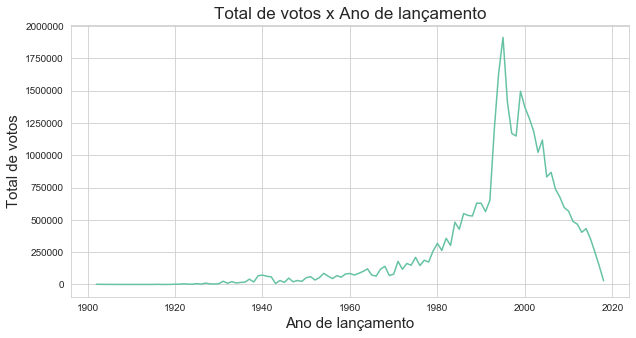

In [64]:
ax = sns.lineplot(data = filmes_total)
ax.figure.set_size_inches(10,5)
ax.set_title('Total de votos x Ano de lançamento' , fontsize = 17)
ax.set_xlabel('Ano de lançamento' , fontsize = 15)
ax.set_ylabel('Total de votos' , fontsize = 15)
ax

Podemos perceber ao plotar o gráfico do Total de votos por ano que o numero de votos é crescente até aproximadamente até a década de 90, quando tem o seu ponto maximo, e após isso se torna decrescente, nesse ponto vale ressaltar que os votos disponiveis do MovieLens podem ocorrer até anos após o lançamento dos filmes, então não necessariamente correspondem a votação na epóca, porém podemos ainda retirar informções importantes, como por exemplo a elevação na taxa de crescimento a partir da década de 80, o que pode significar que esses filmes atrairam mais as pessoas para votas, seja na época por serem grandes lançamentos ou posteriormente por terem se tornaram filmes "cults".

In [65]:
filmes['cte'] = 1

In [66]:
filmes_por_ano= filmes.groupby('ano_de_lancamento')['cte'].sum()

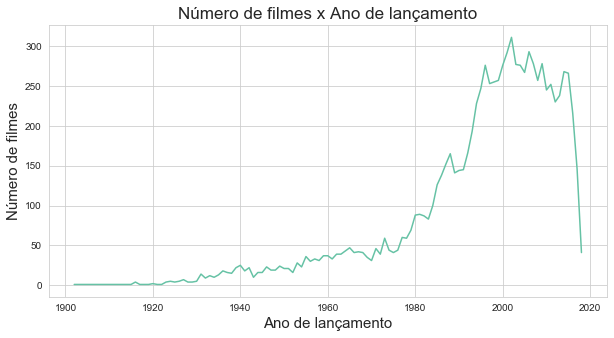

In [67]:
ax= sns.lineplot(data = filmes_por_ano)
ax.figure.set_size_inches(10,5)
ax.set_title('Número de filmes x Ano de lançamento' , fontsize = 17)
ax.set_xlabel('Ano de lançamento' , fontsize = 15)
ax.set_ylabel('Número de filmes' , fontsize = 15)
ax

Podemos perceber que o numero de filmes por ano cresceu num ritmo forte até meados da década de 90 e após isso teve um pequena queda, devemos desconsiderar a parte final do gráfico visto que quando essa análise foi feita os dados se referiam apenas ao inicio do ano, o que significa que após uma forte expansao da industria cinematografica, ela comecou a estagnar em numero de filmes do inicio do sexulo XXI, isso poder ter ocorrido por conta de uma mudança no tipo de negócio da prórpria industria, diminuir o numero de filmes e aumentar a qualidade das produções, ou a perda de mercado para outros tipos de atividades sociais e culturais que surgiram apos o inicio dos seculo, como por exemplo a internet com as redes sociais e os serviços de streaming.